<h1><b>BCHI Data Analysis</b></h1>

<p>Following are the steps we followed for data analysis</p>

<p>1. Import the libraries</p>

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<p>2.Load the dataset.</p>

In [2]:
dataset=pd.read_csv('data.csv')

In [3]:
dataset.head(3)

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2


<p>Above we saw the column names and we might need to fix the spaces in the column names. In order to change that we
need to first know what are the actual names of the columns.</p>

<p>We do that using the pandas function <i>columns</i> to list all the columns</p>

In [4]:
dataset.columns

Index(['Indicator Category', 'Indicator', 'Year', 'Sex', 'Race/Ethnicity',
       'Value', 'Place', 'BCHC Requested Methodology', 'Source', 'Methods',
       'Notes', '90% Confidence Level - Low', '90% Confidence Level - High',
       '95% Confidence Level - Low', '95% Confidence Level - High'],
      dtype='object')

<p>Now we rename the columns</p>

In [5]:
dataset.rename(columns={'Indicator Category':'indicator_category','Indicator':'indicator','Year':'Year', 'Sex':'Sex', 'Race/Ethnicity':'Race/Ethnicity',
       'Value':'Value', 'Place':'Place', 'BCHC Requested Methodology':'BCHC_req_meth', 'Source':'Source', 'Methods':'Methods',
       'Notes':'Notes', '90% Confidence Level - Low':'90pc_con_lvl-low', '90% Confidence Level - High':'90pc_con_lvl-high',
       '95% Confidence Level - Low':'95pc_con_lvl-low','95% Confidence Level - High':'95pc_con_lvl-high'},inplace = True)

<p>3.Now we need to filter the data according to the indicator category. We use one of the values "Cancer".</p>

In [103]:
cancer_ds = dataset.loc[dataset["indicator_category"] == "Cancer"]

<p>4.And then we remove empty columns and unnecessary columns</p>

In [104]:
cancer_ds.drop(['indicator_category','BCHC_req_meth','Source','Methods','Notes','90pc_con_lvl-low','90pc_con_lvl-high'],
                    axis = 1, inplace= True)

<p>5. Now we remove all the rows which has NaN or NA values</p>

In [105]:
cancer_ds.dropna(axis=0, how='any',inplace= True)

In [106]:
cancer_ds.to_csv("Cancer.csv")

In [108]:
cancer_ds.head(3)

,indicator,Year,Sex,Race/Ethnicity,Value,Place,95pc_con_lvl-low,95pc_con_lvl-high
1468,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,All,149.9,"San Francisco, CA",145.3,154.6
1469,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,All,156.7,"Seattle, WA",146.5,167.6
1470,All Types of Cancer Mortality Rate (Age-Adjust...,2010,Both,All,159.9,"San Antonio, TX",153.5,166.4


<b>Analysis</b>
<p>Now we calculate the number of cases for each type of cancer. In order to that we will group according to the 
indicator and take the count.</p>

In [109]:
sorted_cancer = cancer_ds['indicator'].value_counts()
sorted_cancer

All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)     350
Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)             306
Female Breast Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)    175
Name: indicator, dtype: int64

<p>And we plot a histogram to see.</p>

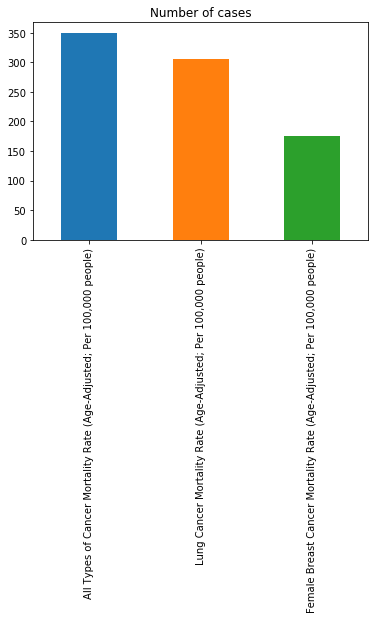

In [110]:
labels=list(cancer_ds.columns)

sorted_cancer = cancer_ds['indicator'].value_counts().plot(title='Number of cases', kind='bar')
plt.show()
#label=list(group.columns)